# Tools for visualizing data (OPTIONAL)

This optional notebook is a "tour" of just a few of the data visualization capabilities available to you in Python. It focuses on two packages: [Bokeh](https://blog.modeanalytics.com/python-data-visualization-libraries/) for creating _interactive_ plots and [Seaborn](https://seaborn.pydata.org) for creating "static" (or non-interactive) plots. The former is really where the ability to develop _programmatic_ visualizations, that is, code that generates graphics, really shines. But the latter is important in printed materials and reports. So, both techniques should be a core part of your toolbox.

With that, let's get started!

> **Note 1.** Since visualizations are not amenable to autograding, this notebook is more of a demo of what you can do. It doesn't require you to write any code on your own. However, we strongly encourage you to spend some time experimenting with the basic methods here and generate some variations on your own. Once you start, you'll find it's more than a little fun!
>
> **Note 2.** Though designed for R programs, Hadley Wickham has an [excellent description of many of the principles in this notebook](http://r4ds.had.co.nz/data-visualisation.html).
>
> **Note 3.** There are a [ridiculous number of other packages for data visualization in Python](https://www.anaconda.com/blog/python-data-visualization-2018-why-so-many-libraries). Among these, another one you might learn on your own is [Altair](https://altair-viz.github.io/), which is not covered here.

## Part 0: Downloading some data to visualize

For the demos in this notebook, we'll need the Iris dataset. The following code cell downloads it for you.

In [1]:
import requests
import os
import hashlib
import io

def download(file, url_suffix=None, checksum=None):
    if url_suffix is None:
        url_suffix = file
        
    if not os.path.exists(file):
        url = 'https://cse6040.gatech.edu/datasets/{}'.format(url_suffix)
        print("Downloading: {} ...".format(url))
        r = requests.get(url)
        with open(file, 'w', encoding=r.encoding) as f:
            f.write(r.text)
            
    if checksum is not None:
        with io.open(file, 'r', encoding='utf-8', errors='replace') as f:
            body = f.read()
            body_checksum = hashlib.md5(body.encode('utf-8')).hexdigest()
            assert body_checksum == checksum, \
                "Downloaded file '{}' has incorrect checksum: '{}' instead of '{}'".format(file, body_checksum, checksum)
    
    print("'{}' is ready!".format(file))
    
datasets = {'iris.csv': ('tidy', 'd1175c032e1042bec7f974c91e4a65ae'),
            'tips.csv': ('seaborn-data', 'ee24adf668f8946d4b00d3e28e470c82'),
            'anscombe.csv': ('seaborn-data', '2c824795f5d51593ca7d660986aefb87'),
            'titanic.csv': ('seaborn-data', '56f29cc0b807cb970a914ed075227f94')
           }

for filename, (category, checksum) in datasets.items():
    download(filename, url_suffix='{}/{}'.format(category, filename), checksum=checksum)
    
print("\n(All data appears to be ready.)")

'iris.csv' is ready!
'tips.csv' is ready!
'anscombe.csv' is ready!
'titanic.csv' is ready!

(All data appears to be ready.)


# Part 1: Bokeh and the Grammar of Graphics ("lite")

Let's start with some methods for creating an interactive visualization in Python and Jupyter, based on the [Bokeh](https://bokeh.pydata.org/en/latest/) package. It generates JavaScript-based visualizations, which you can then run in a web browser, without you having to know or write any JS yourself. The web-friendly aspect of Bokeh makes it an especially good package for creating interactive visualizations in a Jupyter notebook, since it's also browser-based.

The design and use of Bokeh is based on Leland Wilkinson's Grammar of Graphics (GoG).

> If you've encountered GoG ideas before, it was probably when using the best known implementation of GoG, namely, Hadley Wickham's R package, [ggplot2](http://ggplot2.org/).

## Setup

Here are the modules we'll need for this notebook:

In [2]:
from IPython.display import display, Markdown
import pandas as pd
import bokeh

Bokeh is designed to output HTML, which you can then embed in any website. To embed Bokeh output into a Jupyter notebook, we need to do the following:

In [3]:
from bokeh.io import output_notebook
from bokeh.io import show
output_notebook ()

Loading BokehJS ...

## Philosophy: Grammar of Graphics

[The Grammar of Graphics](http://www.springer.com.prx.library.gatech.edu/us/book/9780387245447) is an idea of Leland Wilkinson. Its basic idea is that the way most people think about visualizing data is ad hoc and unsystematic, whereas there exists in fact a "formal language" for describing visual displays.

The reason why this idea is important and powerful in the context of our course is that it makes visualization more systematic, thereby making it easier to create those visualizations through code.

The high-level concept is simple:
1. Start with a (tidy) data set.
2. Transform it into a new (tidy) data set.
3. Map variables to geometric objects (e.g., bars, points, lines) or other aesthetic "flourishes" (e.g., color).
4. Rescale or transform the visual coordinate system.
5. Render and enjoy!

![From data to visualization](http://r4ds.had.co.nz/images/visualization-grammar-3.png)

> This image is "liberated" from: http://r4ds.had.co.nz/data-visualisation.html

## HoloViews

Before seeing Bokeh directly, let's start with an easier way to take advantage of Bokeh, which is through a higher-level interface known as [HoloViews](http://holoviews.org/). HoloViews provides a simplified interface suitable for "canned" charts.

To see it in action, let's load the Iris data set and study relationships among its variables, such as petal length vs. petal width.

The cells below demonstrate histograms, simple scatter plots, and box plots. However, there is a much larger gallery of options: http://holoviews.org/reference/index.html

In [4]:
flora = pd.read_csv ('iris.csv')
display (flora.head ())

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
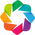

In [5]:
from bokeh.io import show
import holoviews as hv
import numpy as np
hv.extension('bokeh')

### 1. Histogram

* The Histogram(f, e) can takes two arguments, frequencies and edges (bin boundaries).
* These can easily be created using numpy's histogram function as illustrated below.
* The plot is interactive and comes with a bunch of tools. You can customize these tools as well; for your many options, see http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html.

> You may see some warnings appear in a pink-shaded box. You can ignore these. They are caused by some slightly older version of the Bokeh library that is running on Vocareum.

In [6]:
frequencies, edges = np.histogram(flora['petal width'], bins = 5)
hv.Histogram(frequencies, edges, label = 'Histogram')

:Histogram   [x]   (Frequency)

A user can interact with the chart above using the tools shown on the right-hand side. Indeed, you can select or customize these tools! You'll see an example below.

### 2. ScatterPlot

In [7]:
hv.Scatter(flora[['petal width','sepal length']],label = 'Scatter plot')

:Scatter   [petal width]   (sepal length)

### 3. BoxPlot

In [8]:
hv.BoxWhisker(flora['sepal length'], label = "Box whiskers plot")

:BoxWhisker   (y)

## Mid-level charts: the Plotting interface

Beyond the canned methods above, Bokeh provides a "mid-level" interface that more directly exposes the grammar of graphics methodology for constructing visual displays.

The basic procedure is 
* Create a blank canvas by calling `bokeh.plotting.figure`
* Add glyphs, which are geometric shapes.

> For a full list of glyphs, refer to the methods of `bokeh.plotting.figure`: http://bokeh.pydata.org/en/latest/docs/reference/plotting.html

In [9]:
from bokeh.plotting import figure

# Create a canvas with a specific set of tools for the user:
TOOLS = 'pan,box_zoom,wheel_zoom,lasso_select,save,reset,help'
p = figure(width=500, height=500, tools=TOOLS)
print(p)

Figure(id='1455', ...)


In [10]:
# Add one or more glyphs
p.triangle(x=flora['petal width'], y=flora['petal length'])

GlyphRenderer(id='1492', ...)

In [11]:
show(p)

**Using data from Pandas.** Here is another way to do the same thing, but using a Pandas data frame as input.

In [12]:
from bokeh.models import ColumnDataSource

data=ColumnDataSource(flora)
p=figure()
p.triangle(source=data, x='petal width', y='petal length')
show(p)

**Color maps.** Let's make a map that assigns each unique species its own color. Incidentally, there are many choices of colors! http://bokeh.pydata.org/en/latest/docs/reference/palettes.html

In [13]:
# Determine the unique species
unique_species = flora['species'].unique()
print(unique_species)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [14]:
# Map each species with a unique color
from bokeh.palettes import brewer
color_map = dict(zip(unique_species, brewer['Dark2'][len(unique_species)]))
print(color_map)

{'Iris-setosa': '#1b9e77', 'Iris-versicolor': '#d95f02', 'Iris-virginica': '#7570b3'}


In [15]:
# Create data sources for each species
data_sources = {}
for s in unique_species:
    data_sources[s] = ColumnDataSource(flora[flora['species']==s])

Now we can more programmatically generate the same plot as above, but use a unique color for each species.

In [16]:
p = figure()
for s in unique_species:
    p.triangle(source=data_sources[s], x='petal width', y='petal length', color=color_map[s])
show(p)

That's just a quick tour of what you can do with Bokeh. We will incorporate it into some of our future labs. At this point, we'd encourage you to experiment with the code cells above and try generating your own variations!

# Part 2: Static visualizations using Seaborn

Parts of this lab are taken from publicly available Seaborn tutorials.
http://seaborn.pydata.org/tutorial/distributions.html

They were adapted for use in this notebook by [Shang-Tse Chen at Georgia Tech](https://www.cc.gatech.edu/~schen351).

In [17]:
import seaborn as sns

# The following Jupyter "magic" command forces plots to appear inline
# within the notebook.
%matplotlib inline

Matplotlib is building the font cache using fc-list. This may take a moment.


When dealing with a set of data, often the first thing we want to do is get a sense for how the variables are distributed. Here, we will look at some of the tools in seborn for examining univariate and bivariate distributions.

### Plotting univariate distributions
 distplot() function will draw a histogram and fit a kernel density estimate

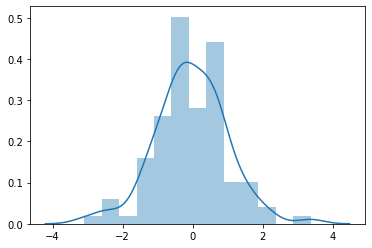

In [18]:
import numpy as np
x = np.random.normal(size=100)
sns.distplot(x)

## Plotting bivariate distributions

The easiest way to visualize a bivariate distribution in seaborn is to use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [19]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

**Basic scatter plots.** The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values. You can draw a scatterplot with the matplotlib plt.scatter function, and it is also the default kind of plot shown by the jointplot() function:

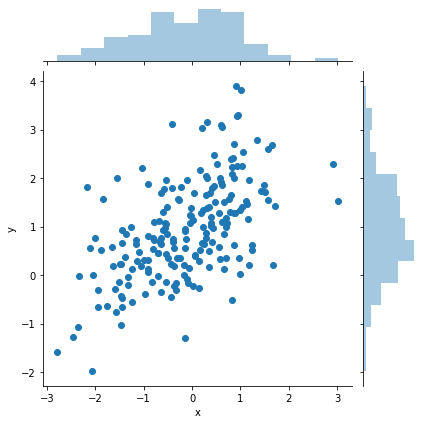

In [20]:
sns.jointplot(x="x", y="y", data=df)

**Hexbin plots.** The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It’s availible through the matplotlib plt.hexbin function and as a style in jointplot()

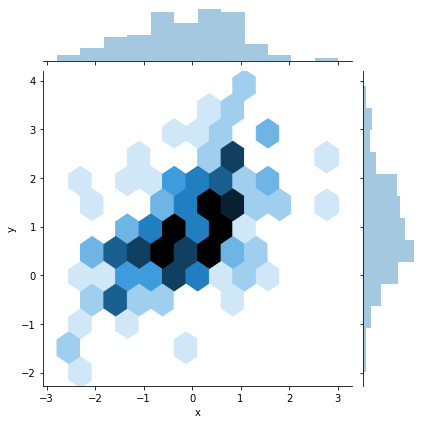

In [21]:
sns.jointplot(x="x", y="y", data=df, kind="hex")

**Kernel density estimation.** It is also posible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot()

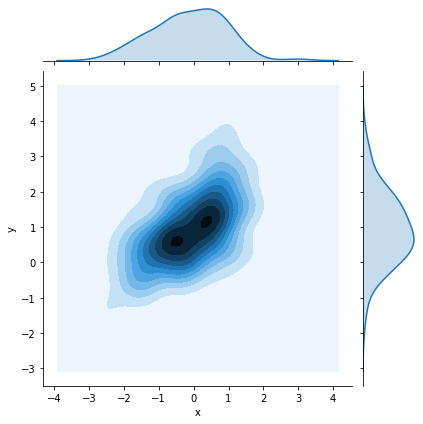

In [22]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

## Visualizing pairwise relationships in a dataset
To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:

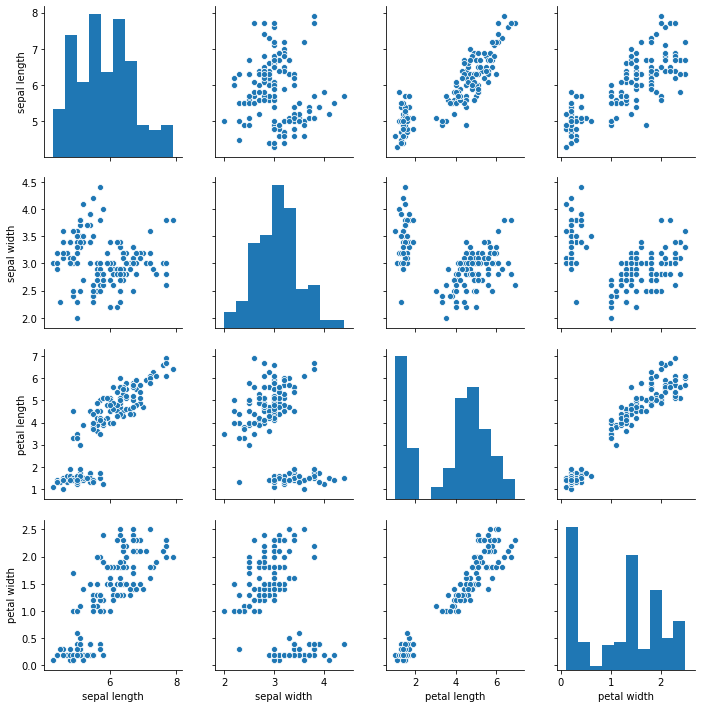

In [23]:
sns.pairplot(flora)

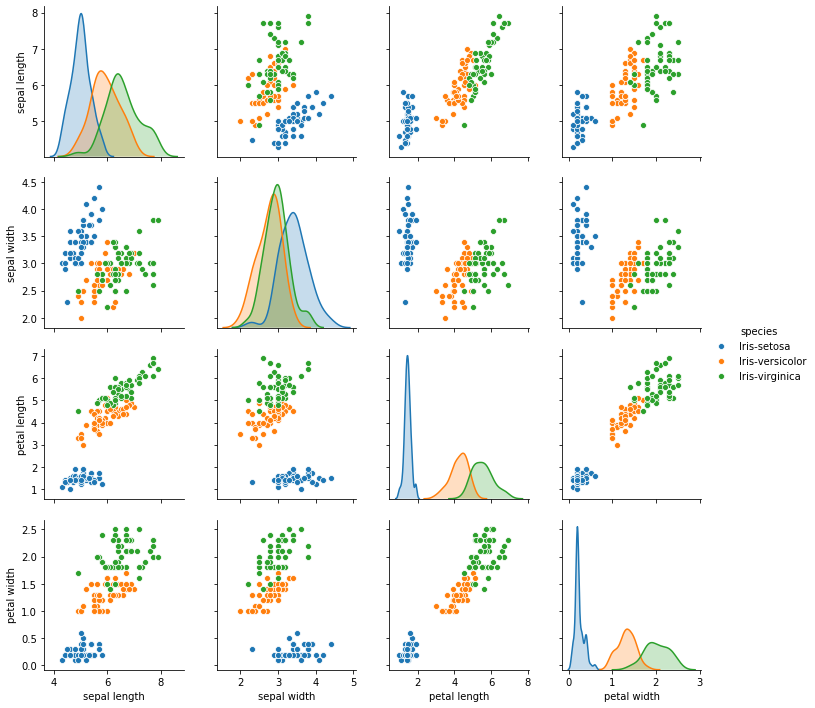

In [24]:
# We can add colors to different species
sns.pairplot(flora, hue="species")

### Visualizing linear relationships

In [25]:
tips = pd.read_csv("tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We can use the function `regplot` to show the linear relationship between total_bill and tip. 
It also shows the 95% confidence interval.

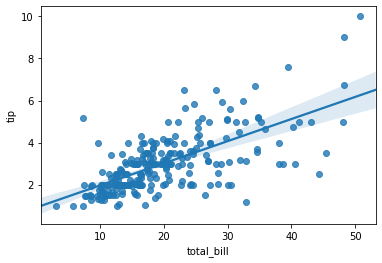

In [26]:
sns.regplot(x="total_bill", y="tip", data=tips)

### Visualizing higher order relationships

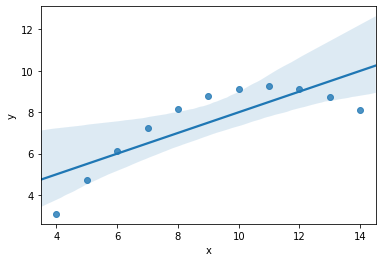

In [27]:
anscombe = pd.read_csv("anscombe.csv")
sns.regplot(x="x", y="y", data=anscombe[anscombe["dataset"] == "II"])

The plot clearly shows that this is not a good model.
Let's try to fit a polynomial regression model with degree 2.

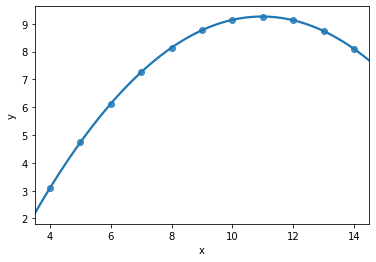

In [28]:
sns.regplot(x="x", y="y", data=anscombe[anscombe["dataset"] == "II"], order=2)

**Strip plots.** This is similar to scatter plot but used when one variable is categorical.

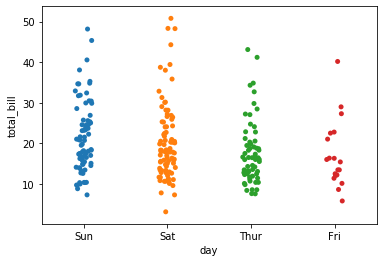

In [29]:
sns.stripplot(x="day", y="total_bill", data=tips)

**Box plots.**

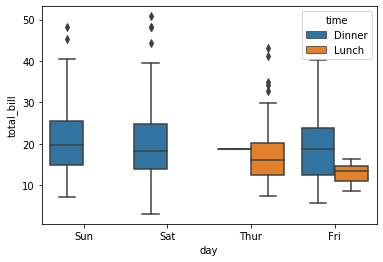

In [30]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

**Bar plots.**

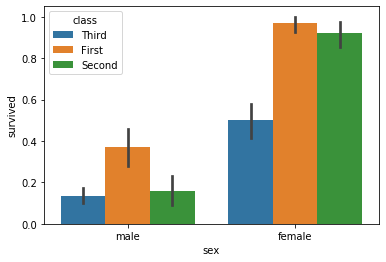

In [31]:
titanic = pd.read_csv("titanic.csv")
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

**Fin!** That ends this tour of basic plotting functionality available to you in Python. It only scratches the surface of what is possible. We'll explore more advanced features in future labs, but in the meantime, we encourage you to play with the code in this notebook and try to generate your own visualizations of datasets you care about!

In [32]:
# Test cell: `freebie_test`
assert True